In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [238]:
# df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter_mov20_mejor.txt', sep='\t')
df = pd.read_csv('../histogramfilter_filtrado.txt',  sep='\t')

In [239]:
df.head()

,Unnamed: 0,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,...,pose_x,pose_y,pose_yaw,diff_x_real,odom_pos_x,odom_pos_y,odom_pos_y_old,ack_pos_x,ack_pos_y,delta_time
0,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.2
1,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
2,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.74989,0.0054,1.57075,0.00000,-0.00003,0.0,0.0,0.0,0.0,0.2
3,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.74989,0.0054,1.57075,0.74989,-0.00007,0.0,0.0,0.0,0.0,0.2
4,NaN,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.74989,0.0054,1.57075,0.74989,-0.00013,0.0,0.0,0.0,0.0,0.2


In [240]:
# global pose
inicio = 0
fin = 500

X = df['pose_x'].values[inicio:fin]
Y = df['pose_y'].values[inicio:fin]
Yaw = df['pose_yaw'].values[inicio:fin]

X_origen = X - 0.749900
Y_origen = Y - 0.004208

localization_hist = df.iloc[inicio:fin, 1:155].as_matrix()

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


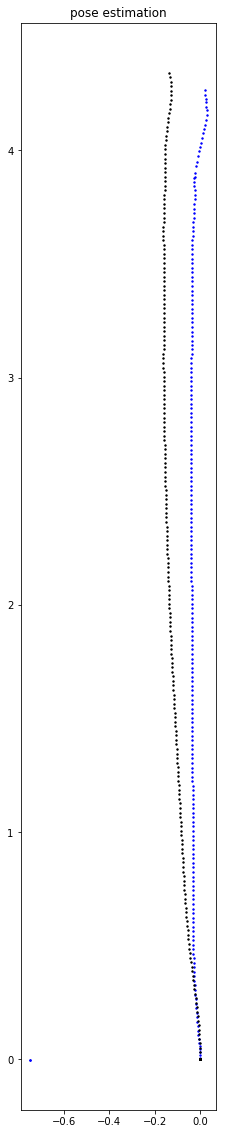

In [241]:
plt.figure(figsize=(20, 20))

plt.title("pose estimation")

plt.scatter(X_origen, Y_origen, color='b', s=2)

#plt.scatter(df['odom_pos_x'], df['odom_pos_y'], color='r', s=2)
#plt.scatter(df['ack_pos_x'], df['ack_pos_y'], color='k', s=2)

# plt.scatter(-df['odom_pos_y'], df['odom_pos_x'], color='r', s=2)
plt.scatter(-df['ack_pos_y'], df['ack_pos_x'], color='k', s=2)

plt.axes().set_aspect('equal')

plt.show()

In [210]:
# odometry
odom_X = df['odom_y'].values[inicio:fin]
odom_Y = df['odom_x'].values[inicio:fin]

odom_Yaw = df['odom_theta'].values[inicio:fin]
odom_Yaw = pd.DataFrame({'odom_theta': [1.57] * len(odom_Yaw)})

odom_x_corregida = 0.74 - odom_Y
odom_y_corregida = 0.008 + odom_X

U = np.cos(Yaw)
V = np.sin(Yaw)

odom_U = np.cos(odom_Yaw)
odom_V = np.sin(odom_Yaw)

odom_U_c = np.cos(1.57 + odom_Yaw)
odom_V_c = np.sin(1.57 + odom_Yaw)

In [211]:
df.loc[100:150, ['pose_x', 'pose_y', 'odom_pos_x', 'odom_pos_y', 'ack_pos_x', 'ack_pos_y']]

,pose_x,pose_y,odom_pos_x,odom_pos_y,ack_pos_x,ack_pos_y
100,0.56821,1.36797,1.78604,-0.96651,2.57750,2.57090
101,0.56743,1.38702,1.81221,-0.99535,2.62327,2.61395
102,0.56651,1.40785,1.83809,-1.02530,2.67012,2.65581
103,0.56566,1.42683,1.86397,-1.05343,2.71722,2.69739
104,0.56397,1.44771,1.88973,-1.08143,2.76457,2.73870
105,0.56253,1.46663,1.91564,-1.11000,2.81216,2.77972
106,0.56118,1.48750,1.94156,-1.13859,2.85991,2.82056
107,0.56020,1.50642,1.96733,-1.16817,2.90822,2.86074
108,0.55954,1.52732,1.99320,-1.19778,2.95707,2.90025
109,0.55860,1.54633,2.01880,-1.22569,3.00601,2.93966


In [212]:
cell_width = 0.008571428571428572
df.loc[100:110, ['pose_x']].diff().apply( lambda x: x / cell_width)
#df['pose_x'].diff().head()

,pose_x
100,NaN
101,-0.091000
102,-0.107333
103,-0.099167
104,-0.197167
105,-0.168000
106,-0.157500
107,-0.114333
108,-0.077000
109,-0.109667


cell_width: 0.008571428571428572


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


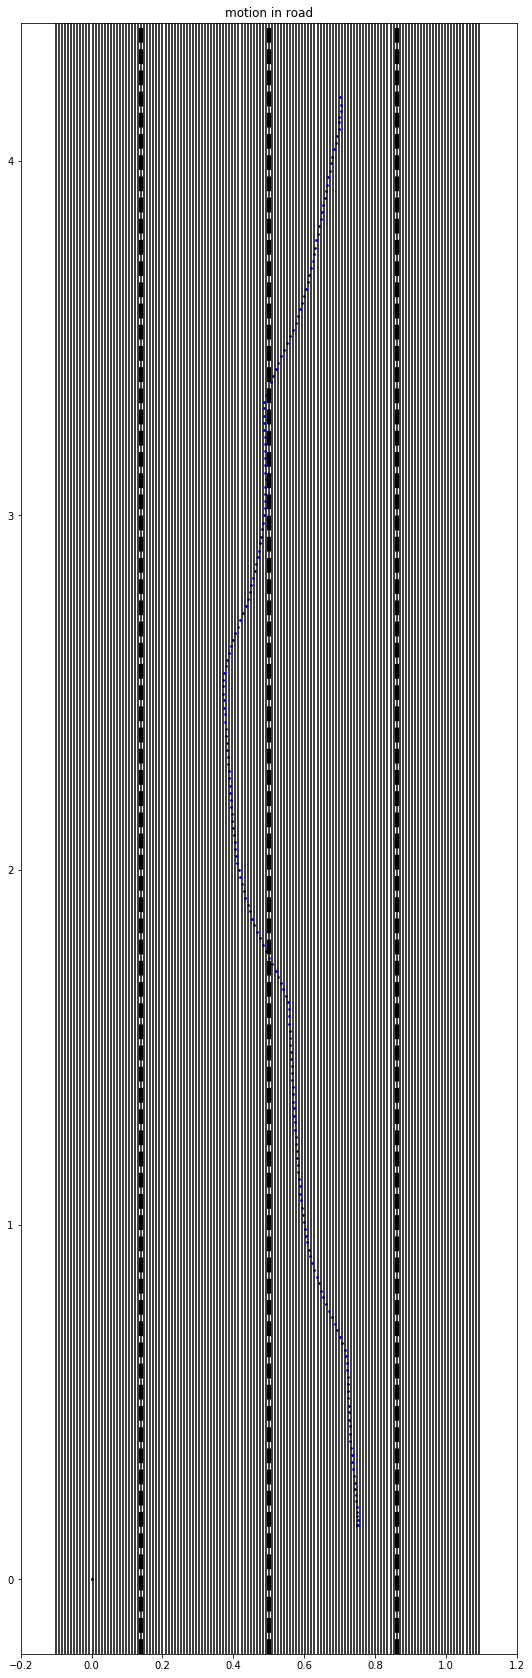

In [213]:
right_x = 0.86
center_x = 0.5
left_x = 0.14
out_road_dist = 0.24
num_states = 7
state_width = 20

lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
print("cell_width: {}".format(cell_width))
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

plt.figure(figsize=(20, 30))
plt.title("motion in road")


# show probabilistic localization
z = localization_hist.flatten() * 254
# colors = plt.cm.get_cmap('Blues')(z)
# plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

# lines of road



# show orientation
# from global pose
# Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)
# from odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

plt.scatter(X, Y, color='b', s=3)
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

# plt.scatter(odom_x_corregida, odom_y_corregida, color='r', s=1)

plt.axes().set_xlim([-0.2, 1.2])
plt.axes().set_aspect('equal')

plt.axvline(right_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
plt.axvline(center_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
plt.axvline(left_x, color='k', linestyle='dashed', linewidth=4)  #'k--', linewidth=4)

for x_i in points_x:
    plt.axvline(x_i, color='k', linestyle='solid')

#f, ax = plt.subplots() # figsize=(20, 30)

# Q = ax.quiver(odom_X, odom_Y, odom_U, odom_V, color='b', pivot='mid', 
#              units='xy', scale=40, width=.009)

#ax.set_title("Odometry")
#ax.set_aspect('equal')

plt.show()